In [56]:
#imports libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [57]:
# import dataset 
dataset = pd.read_csv("customer_data.csv")
# print dataset dimension
print(dataset.shape)

(89973, 10)


In [58]:
dataset.head(10)

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Buy_Amount_Grade,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class
0,3,9309,9409,0.06,1,G,0,50,30.00,0
1,0,9410,9503,0.20,4,E,0,5,8.75,0
2,6,9309,9503,0.13,2,G,0,25,22.50,0
3,0,9210,9411,0.10,1,G,0,25,12.50,0
4,2,9501,9509,0.14,2,F,0,5,7.75,0
5,7,9410,9410,0.06,1,G,0,25,25.00,0
6,5,9109,9412,0.39,4,E,X,10,7.65,0
7,6,8602,9411,0.16,2,E,X,14,9.30,0
8,0,9003,9408,0.23,1,E,X,11,9.15,0
9,5,9101,9503,0.12,2,F,X,20,14.57,1


In [59]:
dataset.describe()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Last_Buy_Amount,Buy_Amount_Average,Class
count,89973.000000,89973.000000,89973.000000,89973.000000,89973.000000,89973.000000,89973.000000,89973.000000
mean,3.024841,9035.760395,9448.329955,0.175125,1.907917,17.456904,13.296918,0.051038
std,2.302047,316.451015,49.466388,0.099399,1.072765,38.602396,10.244314,0.220076
min,0.000000,7205.000000,9403.000000,0.020000,1.000000,0.000000,1.570000,0.000000
25%,1.000000,8711.000000,9409.000000,0.100000,1.000000,10.000000,8.360000,0.000000
50%,3.000000,9101.000000,9412.000000,0.150000,1.000000,15.000000,11.600000,0.000000
75%,5.000000,9309.000000,9502.000000,0.220000,3.000000,20.000000,15.400000,0.000000
max,7.000000,9503.000000,9602.000000,1.540000,4.000000,10000.000000,948.500000,1.000000


In [60]:
#total info af dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 10 columns):
Customer_Income       89973 non-null int64
First_Buy_Data        89973 non-null int64
Last_Buy_Data         89973 non-null int64
Average_Buy_Amount    89973 non-null float64
Frequency_Level       89973 non-null int64
Buy_Amount_Grade      89973 non-null object
Special_Buyer         89973 non-null object
Last_Buy_Amount       89973 non-null int64
Buy_Amount_Average    89973 non-null float64
Class                 89973 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 6.9+ MB


In [61]:
# display missing values of dataset
dataset.isnull()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Buy_Amount_Grade,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


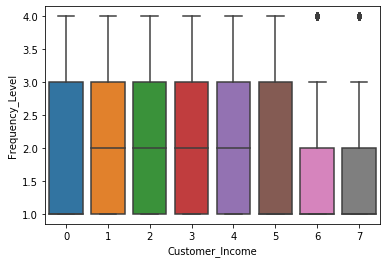

In [62]:
#plot boxplot 
sns.boxplot(x="Customer_Income", y="Frequency_Level", data=dataset)

In [64]:
# normalize First_Buy_Data & Last_Buy_Data columns
dataset[['First_Buy_Data']] = normalize(dataset[['First_Buy_Data']], axis=0)
dataset[['Last_Buy_Data']] = normalize(dataset[['Last_Buy_Data']], axis=0)

In [65]:
#check data again
dataset.head()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Buy_Amount_Grade,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class
0,3,0.003433,0.003320,0.06,1,G,0,50,30.00,0
1,0,0.003470,0.003353,0.20,4,E,0,5,8.75,0
2,6,0.003433,0.003353,0.13,2,G,0,25,22.50,0
3,0,0.003396,0.003321,0.10,1,G,0,25,12.50,0
4,2,0.003503,0.003355,0.14,2,F,0,5,7.75,0


In [66]:
# Special_Buyer column unique values
print("Special_Buyer -> ", dataset['Special_Buyer'].unique())
# Special_Buyer column change pattern
special_buyer_replace = {'Special_Buyer': {'X': 1, '0': 0}}
# replace column values
dataset.replace(special_buyer_replace, inplace=True)
# Special_Buyer column after replace
print("Special_Buyer -> ", dataset['Special_Buyer'].unique())

Special_Buyer ->  ['0' 'X']
Special_Buyer ->  [0 1]


# One-Hot  
## pd.get_dummies()
### To change the Grade column with [E, F, G, H] values to 4 columns with only [0 , 1] values we use the get_dummy 

In [67]:
change_grade = pd.get_dummies(dataset['Buy_Amount_Grade'], prefix='grade')
dataset = pd.concat([dataset, change_grade], axis=1)
dataset.drop(['Buy_Amount_Grade'], axis=1, inplace=True)
dataset.head()

,Customer_Income,First_Buy_Data,Last_Buy_Data,Average_Buy_Amount,Frequency_Level,Special_Buyer,Last_Buy_Amount,Buy_Amount_Average,Class,grade_D,grade_E,grade_F,grade_G
0,3,0.003433,0.003320,0.06,1,0,50,30.00,0,0,0,0,1
1,0,0.003470,0.003353,0.20,4,0,5,8.75,0,0,1,0,0
2,6,0.003433,0.003353,0.13,2,0,25,22.50,0,0,0,0,1
3,0,0.003396,0.003321,0.10,1,0,25,12.50,0,0,0,0,1
4,2,0.003503,0.003355,0.14,2,0,5,7.75,0,0,0,1,0


In [38]:
#number of culemns from 10 change to 13 
dataset.shape

(89973, 13)

# Correlation

In [39]:
# Plotting correlation function
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Display:
        matrix of correlation between columns. Purple-to-yellow => less to more correlated
                                               0 ----------------> 1
                                               Expect a yellow line running from the top left to bottom right
    """
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

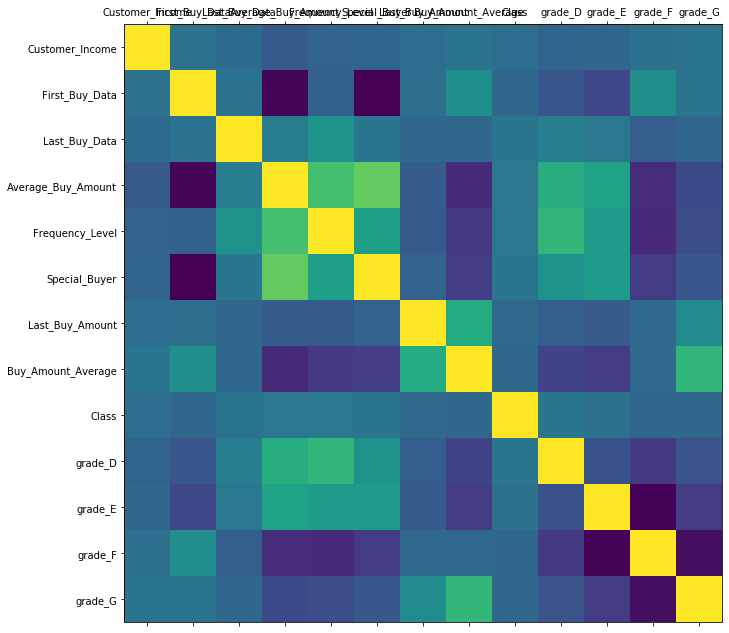

In [132]:
plot_corr(dataset)

# Train and test split

In [82]:
# prediction features columns
feature_col_names = ['Customer_Income', 'First_Buy_Data', 'Last_Buy_Data', 'Average_Buy_Amount', 'Frequency_Level', 
          'grade_D', 'grade_E', 'grade_F', 'grade_G', 'Special_Buyer', 'Last_Buy_Amount', 'Buy_Amount_Average']
# prediction class column 
predicted_class_names = ['Class']
# get feature columns values from dataset
X = dataset[feature_col_names].values
# get class column values from dataset
y = dataset[predicted_class_names].values  
# split dataset features and prediction class to test and train parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# print size of test and train parts
print((len(X_train) / len(dataset.index)))
print((len(X_test) / len(dataset.index) ))

0.6999988885554556
0.3000011114445445


In [84]:
# size of train and test of data
print('training set:  ')
print((len(X_train) / len(dataset.index)))
print('test set: ')
print((len(X_test) / len(dataset.index) ))

training set:  
0.6999988885554556
test set: 
0.3000011114445445


In [85]:
print(dataset.index)

RangeIndex(start=0, stop=89973, step=1)


# DecisionTree

In [86]:
# DecisionTreeClassifier model object and train it with data
classifier = DecisionTreeClassifier()  

# fit the data
classifier.fit(X_train, y_train)  

# predicted values using the training data
y_pred = classifier.predict(X_test) 

# accuracy
print(metrics.accuracy_score(y_test, y_pred))
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

0.8943761114404268
Accuracy: 89.44%


In [43]:
# accuracy
print(" accuracy: " ,metrics.accuracy_score(y_test, y_pred))

 accuracy:  0.8960432720806165


# Random Forest

In [44]:
# train data with random forest 
rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train)

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
# Predict values using the training data
rf_predict_train = rf_model.predict(X_train)

# Accuracy
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_train, rf_predict_train) * 100))

Accuracy: 98.59%


In [87]:
# Predict values using the testing data
rf_predict_test = rf_model.predict(X_test)

# Accuracy
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, rf_predict_test) * 100))

Accuracy: 97.56%


# Logistic Regression

In [89]:
# recall  logistic regrassion
logistic_model = LogisticRegression()

#fit data by logistic Regression
logistic_model.fit(X_train, y_train)

# Comparison 
logistic_predict_test = logistic_model.predict(X_test)
# accuracy 
print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, logistic_predict_test) * 100))


c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 95.06%


In [90]:
#accuracy
print(metrics.accuracy_score(y_test, logistic_predict_test))

0.9506149970361588


# Logistic Regression (Cross Validation)

In [ ]:
#n_jobs=-1, Cs=3, cv=10, refit=True, class_weight='balanced', random_state=42

In [91]:
#recall Logestic Regression CV and train data
logistic_cv_model = LogisticRegressionCV()
logistic_cv_model.fit(X_train, y_train)

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [92]:
logistic_cv_predict_test = logistic_cv_model.predict(X_test)

print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, logistic_cv_predict_test) * 100))
print()


Accuracy: 95.06%



In [51]:
logistic_cv_model = LogisticRegressionCV(Cs=3, cv=10, class_weight='balanced')
logistic_cv_model.fit(X_train, y_train)

c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [52]:
logistic_cv_predict_test = logistic_cv_model.predict(X_test)

print('Accuracy: {0:.2f}%'.format(metrics.accuracy_score(y_test, logistic_cv_predict_test) * 100))
print()

Accuracy: 61.98%



In [53]:
#by change parameter of logestic regression cross validation the result change from 0.95 to 0.61 !! for why?